<a href="https://colab.research.google.com/github/sheezarainbow9/Notebooks/blob/main/Sheeza_Aula0302Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import colorsys
plt.style.use('seaborn-dark-palette')  # Um estilo pronto para criar o gráfico.

In [2]:
# Carregando o dataset:
dados = pd.read_csv('/content/Dados-Pesquisa.csv')  # Copia e cola o caminho do arquivo que está na pastinha à esquerda.

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (21,57) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# Imprimir cabeçalho:
dados.head() 

,Age,AttendedBootcamp,BootcampFinish,BootcampFullJobAfter,BootcampLoanYesNo,BootcampMonthsAgo,BootcampName,BootcampPostSalary,BootcampRecommend,ChildrenNumber,...,ResourceSoloLearn,ResourceStackOverflow,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3Schools,ResourceYouTube,SchoolDegree,SchoolMajor,StudentDebtOwe
0,28.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,20000.0
1,22.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,"some college credit, no degree",NaN,NaN
2,19.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high school diploma or equivalent (GED),NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Cinematography And Film,7000.0
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"some college credit, no degree",NaN,NaN


In [4]:
dados.shape

(15620, 113)

In [ ]:
# Lista as colunas:
dados.columns.to_list()

In [7]:
# Faça uma cópia antes de trabalhar os dados:
df2 = dados.copy()

In [8]:
# Somar os valores Nan encontrados:
dados.isna().sum()

Age                      2007
AttendedBootcamp          240
BootcampFinish          14687
BootcampFullJobAfter    14985
BootcampLoanYesNo       14686
                        ...  
ResourceW3Schools       15499
ResourceYouTube         15499
SchoolDegree             1941
SchoolMajor              7170
StudentDebtOwe          12106
Length: 113, dtype: int64

In [10]:
# Total geral dos NaN:
dados.isna().sum().sum()

1183948

In [11]:
# Apagar os NaN da coluna Age:
dados.dropna(subset = ['Age'], inplace=True)

In [12]:
dados.isna().sum()

Age                         0
AttendedBootcamp          112
BootcampFinish          12809
BootcampFullJobAfter    13068
BootcampLoanYesNo       12805
                        ...  
ResourceW3Schools       13508
ResourceYouTube         13506
SchoolDegree              113
SchoolMajor              5265
StudentDebtOwe          10121
Length: 113, dtype: int64

In [13]:
dados.isna().sum().sum()

994850

In [14]:
# Média dos NaN para saber se atrapalharão a análise dos dados:
# Valores próximo de zero não são tão problemáticos.
dados.isna().mean()

Age                     0.000000
AttendedBootcamp        0.008227
BootcampFinish          0.940939
BootcampFullJobAfter    0.959965
BootcampLoanYesNo       0.940645
                          ...   
ResourceW3Schools       0.992287
ResourceYouTube         0.992140
SchoolDegree            0.008301
SchoolMajor             0.386763
StudentDebtOwe          0.743480
Length: 113, dtype: float64

In [16]:
# Boa prática digitar o output.
print(f'A base de dados apresenta {dados.shape[0]} linhas e {dados.shape[1]} colunas.')

A base de dados apresenta 13613 linhas e 113 colunas.


In [17]:
# Total do tipo dos dados:
dados.dtypes.value_counts()

float64    85
object     28
dtype: int64

In [ ]:
# Criando um novo Data Frame apenas com as colunas que queremos:
# O ideal é por outro nome no novo df.
dados = dados[['Age', 'Gender', 'JobPref', 'JobRoleInterest', 'EmploymentField', 'JobRelocateYesNo', 'HoursLearning', 'MoneyForLearning']]
dados

In [19]:
# Deletando dados duplicados:
dados.drop_duplicates()

,Age,Gender,JobPref,JobRoleInterest,EmploymentField,JobRelocateYesNo,HoursLearning,MoneyForLearning
0,28.0,male,freelance,NaN,office and administrative support,NaN,30.0,0.0
1,22.0,male,work for a startup,Front-End Web Developer,food and beverage,1.0,30.0,20.0
2,19.0,male,start your own business,NaN,finance,NaN,20.0,50.0
3,26.0,female,work for a startup,Front-End Web Developer,"arts, entertainment, sports, or media",NaN,20.0,100.0
4,20.0,female,work for a medium-sized company,Full-Stack Web Developer,education,1.0,25.0,1300.0
...,...,...,...,...,...,...,...,...
15615,39.0,male,start your own business,NaN,software development and IT,NaN,40.0,0.0
15616,27.0,male,work for a startup,Front-End Web Developer,software development and IT,1.0,15.0,100.0
15617,37.0,male,freelance,NaN,NaN,NaN,14.0,0.0
15618,26.0,male,NaN,NaN,education,NaN,10.0,30.0


In [20]:
# Vamos ver um resumo estatístico do DataSet:
dados.describe()

,Age,JobRelocateYesNo,HoursLearning,MoneyForLearning
count,13613.000000,4771.000000,13151.000000,13001.000000
mean,29.175714,0.737162,15.350163,1085.875163
std,9.017580,0.440221,14.172325,4752.758651
min,10.000000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,5.000000,0.000000
50%,27.000000,1.000000,10.000000,35.000000
75%,33.000000,1.000000,20.000000,300.000000
max,86.000000,1.000000,100.000000,180000.000000


In [21]:
# Pegando valores qualitativos (não numéricos):
# O = Object (Strings).
dados.describe(include = 'O')

,Gender,JobPref,JobRoleInterest,EmploymentField
count,13573,9846,5659,7533
unique,5,5,9,15
top,male,work for a medium-sized company,Full-Stack Web Developer,software development and IT
freq,10659,2889,2277,4296


In [22]:
# Usando o loc:
dados.loc[dados['Age'] > 30]

,Age,Gender,JobPref,JobRoleInterest,EmploymentField,JobRelocateYesNo,HoursLearning,MoneyForLearning
5,34.0,male,start your own business,NaN,finance,NaN,5.0,0.0
7,35.0,male,freelance,NaN,office and administrative support,NaN,NaN,0.0
8,33.0,male,NaN,NaN,software development,NaN,5.0,3000.0
9,33.0,male,start your own business,NaN,NaN,NaN,20.0,30.0
10,57.0,male,freelance,NaN,NaN,NaN,8.0,400.0
...,...,...,...,...,...,...,...,...
15611,37.0,male,start your own business,NaN,software development and IT,NaN,40.0,200.0
15612,45.0,female,start your own business,NaN,NaN,NaN,2.0,300.0
15614,47.0,male,freelance,NaN,finance,NaN,3.0,0.0
15615,39.0,male,start your own business,NaN,software development and IT,NaN,40.0,0.0


Análise de Idade:

In [24]:
dados.Age.unique()

array([28., 22., 19., 26., 20., 34., 23., 35., 33., 57., 27., 47., 37.,
       31., 29., 30., 32., 25., 44., 21., 24., 18., 39., 41., 43., 36.,
       40., 38., 16., 46., 15., 14., 50., 49., 45., 55., 51., 17., 53.,
       52., 48., 56., 42., 54., 58., 65., 59., 75., 61., 80., 62., 60.,
       66., 12., 11., 13., 63., 64., 70., 73., 69., 71., 68., 86., 10.,
       67., 72.])

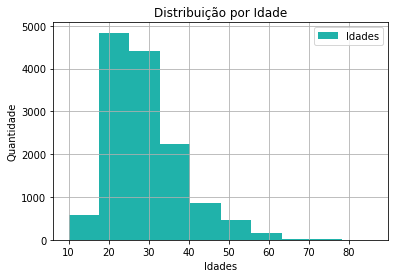

In [26]:
# Qual a distribuição de idade dos participantes da pesquisa?
# Variável Age:
idade = dados.Age  # dados['Age']

# Gráfico Histograma (distribuição de frequência):
plt.hist(idade, label='Idades', color='lightseagreen')
plt.title('Distribuição por Idade')
plt.xlabel('Idades')
plt.ylabel('Quantidade')
plt.legend()
plt.grid(True)
plt.show()

Análise de Gênero:

In [27]:
# Contando os dados da coluna gênero:
dados.Gender.value_counts()

male           10659
female          2777
genderqueer       65
agender           36
trans             36
Name: Gender, dtype: int64

In [29]:
dados.Gender.value_counts().sum()

13573

In [31]:
# Criando Data Frame dos gêneros contados:
tipos_de_genero = pd.DataFrame(dados.Gender.value_counts())

In [32]:
tipos_de_genero.head()

,Gender
male,10659
female,2777
genderqueer,65
agender,36
trans,36


In [33]:
# Nomeando a coluna:
tipos_de_genero.columns.name = 'Tipo'

In [34]:
tipos_de_genero.head()

Tipo,Gender
male,10659
female,2777
genderqueer,65
agender,36
trans,36


In [35]:
# Mostra o índice escolhido:
tipos_de_genero.iloc[0]

Tipo
Gender    10659
Name: male, dtype: int64

In [36]:
# Selecionando linha female e tirando a quantidade:
feminino = tipos_de_genero.iloc[1]
feminino

Tipo
Gender    2777
Name: female, dtype: int64

In [38]:
# Soma de todos os gêneros:
total_genero = dados.Gender.value_counts().sum()
print(f'Soma dos gêneros: {total_genero}')

Soma dos gêneros: 13573


In [41]:
# Porcentagem do gênero feminino:
fem = (feminino / total_genero * 100)
fem

Tipo
Gender    20.459736
Name: female, dtype: float64

In [42]:
# Agroupar por:
# Pela média do gênero:
dados.groupby('Gender').mean()

,Age,JobRelocateYesNo,HoursLearning,MoneyForLearning
Gender,,,,
agender,25.277778,0.642857,13.685714,1023.088235
female,30.685992,0.654365,14.405476,1517.086148
genderqueer,28.215385,0.684211,14.311475,1600.316667
male,28.816118,0.762726,15.602598,967.590887
trans,30.000000,0.714286,17.828571,3019.588235


In [43]:
# Criar variável para plotar os dados:
genero = dados.Gender.value_counts()

([<matplotlib.patches.Wedge at 0x7fafcd289a10>,
 [Text(-0.8591408593565129, 0.686933027146135, ''),
  Text(0.8369300719488886, -0.7138263476978335, ''),
  Text(1.0987131820518923, -0.05319157438359409, ''),
  Text(1.09965633706405, -0.02749436951225578, ''),
  Text(1.0999618139802934, -0.0091655760966081, '')])

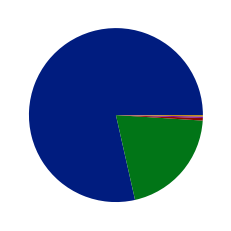

In [44]:
# Criando o gráfico:
plt.pie(genero)

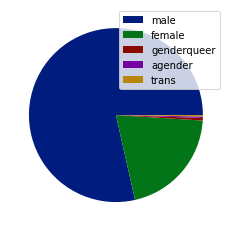

In [45]:
genero = dados.Gender.value_counts()
plt.pie(genero)
plt.legend(dados.Gender.value_counts().index)
plt.show()

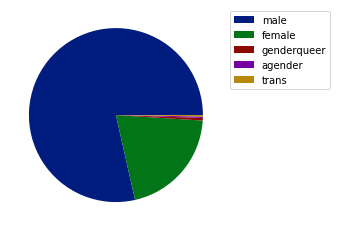

In [50]:
# bbox_to_anchor=(x, y) = desloca a legenda.
genero = dados.Gender.value_counts()
plt.pie(genero)
plt.legend(dados.Gender.value_counts().index, bbox_to_anchor=(1, 1))
plt.show()

Distribuição de Interesses:

In [51]:
# Quais são os principais interesses dos participantes da pesquisa?
# Variável JobRoleInterest:
dados.JobRoleInterest.value_counts()

Full-Stack Web Developer            2277
  Front-End Web Developer           1186
Back-End Web Developer               601
  Data Scientist / Data Engineer     572
  Mobile Developer                   337
  User Experience Designer           237
  DevOps / SysAdmin                  190
  Product Manager                    168
  Quality Assurance Engineer          91
Name: JobRoleInterest, dtype: int64

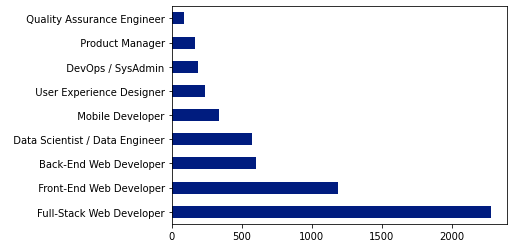

In [53]:
interesses = dados.JobRoleInterest.value_counts()
interesses.plot.barh()

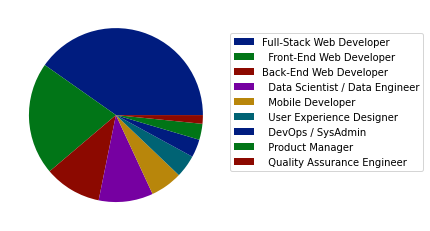

In [56]:
interesses = dados.JobRoleInterest.value_counts()
plt.pie(interesses)
plt.legend(interesses.index, bbox_to_anchor=(1, 0.9))
plt.show()

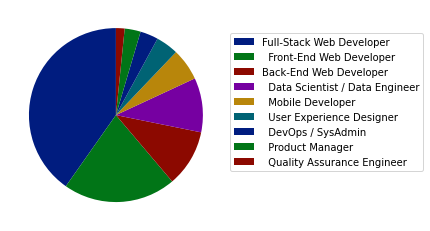

In [57]:
# Mudar o ângulo do gráfico:
plt.pie(interesses, startangle = 90)
plt.legend(interesses.index, bbox_to_anchor=(1, 0.9))
plt.show()

Preferências de Trabalho por Idade:

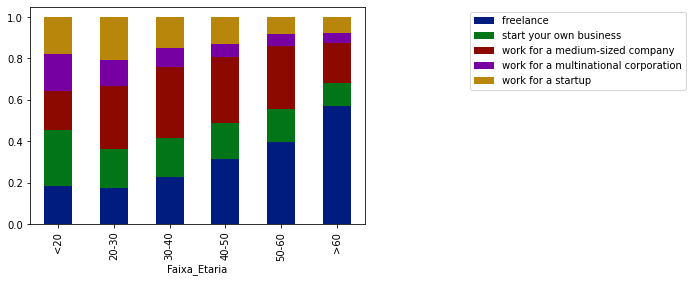

In [67]:
# Quais são as preferências de trabalho por idade?
# Agrupando os dados:
dados2 = dados.copy()
bins = [0, 20, 30, 40, 50, 60, 100]  # Marcações das idades.

# Criar uma coluna 'Faixa_Etaria' e inserir as colunas 'Age' com os labels apropriados:
dados2['Faixa_Etaria'] = pd.cut(dados2['Age'],
                                bins,
                                labels=['<20', '20-30', '30-40', '40-50', '50-60', '>60'])

# Cruzar os dados de 'Faixa_Etaria' com o JobPref:
df2 = pd.crosstab(dados2['Faixa_Etaria'], dados2['JobPref']).apply(lambda r: r/r.sum(), axis=1)

# Gráfico de Barras Empilhados:
df2.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.3, 1))
plt.show()
